# Lab 7: Dynamic Programming

Lab associated with Module 7: Dynamic Programming

***

In [ ]:
# The following lines are used to increase the width of cells to utilize more space on the screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

***

### Section 0: Imports

In [ ]:
import numpy as np

In [ ]:
import math

In [ ]:
from IPython.display import Image
from graphviz import Digraph

Details of Digraph package: https://h1ros.github.io/posts/introduction-to-graphviz-in-jupyter-notebook/

***

### <font color='red'> Activity 1: You are running up a staircase with a total of n steps. You can hop either 1 step, 2 steps or 3 steps at at time. Write a DP program to determine how many possible ways you can run up the stairs? (Hint: Start with a recursive solution, and then later move to top-down approach of DP). </font>

# Climbing stairs using Recursion
- For every step (n), count number of paths to reach n-1.. n-2.. nth.
- nth step, last step is (n-1) or (n-2) only jump 1 or 2 steps at a time.
- step(n) = step(n-1) + step(n-2)
- Same as Fibonacci numbers path(n) = Fibonachi(n+1)
  - Ref: https://www.geeksforgeeks.org/program-for-nth-fibonacci-number/

### Time Complexity
- O(2^n)
- O(n) recursion stack space
- When will recursion end? If N becomes 0 or 1.
- There is an overlapping sub problem!
  - Need a Dynamic Programming solution.


In [ ]:
#Climbing stairs using Recursion - brute force
def count_stairs(n):
  # 1 stairs
  if n <= 1:
    return n

  # +1 stairs
  return count_stairs(n-1) + count_stairs(n-2)


def paths(n):
  # 0 stairs
  if n == 0:
    return 0;
  return count_stairs(n + 1)

### Test Case

In [ ]:
# Test Cases
n = 0 # 0 Steps
print (f"Stairs (n) = {n}")
print (f"Number of paths = {paths(n)}")
print()
print("-" * 40)

n = 1 # 1 Steps
print (f"Stairs (n) = {n}")
print (f"Number of paths = {paths(n)}")
print()
print("-" * 40)

n = 2 # 2 Steps
print (f"Stairs (n) = {n}")
print (f"Number of paths = {paths(n)}")
print()
print("-" * 40)

n = 3 # 3 Steps
print (f"Stairs (n) = {n}")
print (f"Number of paths = {paths(n)}")
print()
print("-" * 40)

n = 4 # 4 Steps
print (f"Stairs (n) = {n}")
print (f"Number of paths = {paths(n)}")
print()
print("-" * 40)

n = 5 # 5 Steps
print (f"Stairs (n) = {n}")
print (f"Number of paths = {paths(n)}")
print()

Stairs (n) = 0
Number of paths = 0

----------------------------------------
Stairs (n) = 1
Number of paths = 1

----------------------------------------
Stairs (n) = 2
Number of paths = 2

----------------------------------------
Stairs (n) = 3
Number of paths = 3

----------------------------------------
Stairs (n) = 4
Number of paths = 5

----------------------------------------
Stairs (n) = 5
Number of paths = 8



# Climbing stairs using Bottom-up approach Dynamic Programming
- Store the results of the subproblems/ tree sub structure to optimise.
- Use iterative structure from recursion
  - step[i] = step[i-1] + step[i-2]

## Idea
- Starts at base case (step[0], step[1] and step[2]) up to step nth.
- Iterate to calculate the ways for each subsequent step.
- Fill table bottom-up, solution is last index of array

### Time Complexity
- Results in O(1), reducing re doing calculations.

In [ ]:
def count_stairs_dp(n):
  # 0 stairs
  if n == 0 or n == 1 or n == 2:
    return n

  # Create array to store number of paths
  step = [0] * (n + 1)
  step[1] = 1
  step[2] = 2

  # Find paths for each step using bottom-up approach
  for i in range(3, n + 1):
    step[i] = step[i - 1] + step[i - 2]

  return step[n]

### Test Case: Created a test function to reduce code duplication!

In [ ]:
def test_count_stairs():
  test_cases = [0, 1, 2, 3, 4, 5, 6, 7]

  for n in test_cases:
    print(f"Stairs (n) = {n}")
    print(f"Number of paths = {count_stairs_dp(n)}")
    print("-" * 40)

test_count_stairs()

Stairs (n) = 0
Number of paths = 0
----------------------------------------
Stairs (n) = 1
Number of paths = 1
----------------------------------------
Stairs (n) = 2
Number of paths = 2
----------------------------------------
Stairs (n) = 3
Number of paths = 3
----------------------------------------
Stairs (n) = 4
Number of paths = 5
----------------------------------------
Stairs (n) = 5
Number of paths = 8
----------------------------------------
Stairs (n) = 6
Number of paths = 13
----------------------------------------
Stairs (n) = 7
Number of paths = 21
----------------------------------------


### <font color='red'> Activity 2: Write the code for finding the Longest Common Sub-sequence. Make sure you output the Matrix C and teh longest sub-sequence as well. Test your code with various use-cases. </font>

# Longest Common Sub-Sequence
- Subsequence: BDFH is a subsequence of ABCDEFGH
- Common subsequence (BDFG) = X(ABCDEFGH) and Y(ABDFGHI)
- Longest Common subsequence (ABDFGH) = X(ABCDEFGH) and Y(ABDFGHI)
- As the longest subsequence which is common in all given input sequences

### Time Complexity
- Walk up and left in an n x m array, for n + m steps
- Find LCS(X,Y) = O(mn)
- if |Y| = n, |X| = m
- 2D table, sub problems (decrementing length of X and Y)

###### Ref:
- https://www.geeksforgeeks.org/longest-common-subsequence-dp-4/
- Module 7 Advanced Algorithms

## Dynamic Programming
- In recursive LCS there is optimal substructure & Overlapping subproblems
#### Optimal Substructure & Overlapping Subproblems
- To solve: L( X[0, 1, ..., m-1], Y[0, 1, ..., n-1])
- Substructures are used: X( [0, 1, ..., m-2], Y[0, 1, ..., n-2] )

#### Implementation
- Create a recursive function
- 2D array to store the result of each state
- During recursion, is same state is called 1+ times
  - Return the answer stored for that state
  - Reduces calculations

###### Ref:
- Data Structures & Algorithms in Python - GoodRich, 2013: Dynamic Programming 13.3

In [ ]:
# Longest Common Subsequence
# Return table such that L[j][k] is length of LCS for X[0:j] and Y[0:k]
def lcs(X, Y):
  n, m = len(X), len(Y)  # introduce convenient notations
  L = [[0] * (m + 1) for k in range(n + 1)]  # (n+1) x (m+1) table

  for j in range(n):
    for k in range(m):
      if X[j] == Y[k]:  # align match
        L[j + 1][k + 1] = L[j][k] + 1
      else:  # ignore one character
        L[j + 1][k + 1] = max(L[j][k + 1], L[j + 1][k])
    return L

def print_matrix(matrix):
  for row in matrix:
    print(row)

def longest_common_subsequence(X, Y):
  L = lcs(X, Y)
  m, n = len(X), len(Y)

  # Trace back to find the longest common subsequence
  longest_subsequence = []
  i, j = m, n
  while i > 0 and j > 0:
    if X[i - 1] == Y[j - 1]:
      longest_subsequence.append(X[i - 1])
      i -= 1
      j -= 1
    elif L[i - 1][j] >= L[i][j - 1]:
      i -= 1
    else:
      j -= 1

  if len(longest_subsequence) == 0:
    return "no LCS"

  longest_subsequence.reverse()
  return L, longest_subsequence

# Test Case 1 - Positive LCS

In [ ]:

X = "AGGTAB"
Y = "GXTXAYB"
L, longest_subsequence = longest_common_subsequence(X, Y)

# Print the matrix L
print("Matrix L:")
print_matrix(L)

# Print LCS
print()
print(f"X =  {X}")
print(f"Y =  {Y}")
print("Longest Common Subsequence:", "".join(longest_subsequence))

Matrix L:
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]

X =  AGGTAB
Y =  GXTXAYB
Longest Common Subsequence: AB


# Additional Test Cases
- Different lengths of inputs
- Empty strings
- LCS is same as input strings
- No LCS

In [ ]:
def test_lcs():
  test = [
      ("AGGTAB", "GXTXAYB"),
      ("ABCBDAB", "BDCAB"),
      ("ACCGGTCGAGTGCGCGGAAGCCGGCCGAA", "GTCGTTCGGAATGCCGTTGCTCTGTAAA"),
      ("ABCD", "DCBA"),
      ("", ""),
      ("ABC", ""),
      ("", "XYZ")
  ]

  for X, Y in test:
    result = longest_common_subsequence(X, Y)
    print(f"Testing for X = {X} and Y = {Y}")

    if isinstance(result, tuple):
      L, longest_subsequence = result

      # Print the matrix L
      print("Matrix L:")
      print_matrix(L)

      # Print the longest common subsequence
      print("Longest Common Subsequence:", "".join(longest_subsequence))
    else:
      print(result)

    print("-" * 40)

test_lcs()

Testing for X = AGGTAB and Y = GXTXAYB
Matrix L:
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
Longest Common Subsequence: AB
----------------------------------------
Testing for X = ABCBDAB and Y = BDCAB
Matrix L:
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 1]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
Longest Common Subsequence: CAB
----------------------------------------
Testing for X = ACCGGTCGAGTGCGCGGAAGCCGGCCGAA and Y = GTCGTTCGGAATGCCGTTGCTCTGTAAA
Matrix L:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

***

### Section 2: Unbounded Knapsack Problem

Let us build a solution to unbounded Knapsack problem.

## Unbounded Knapsack Problem DP
- Knapsack weight (W) and number of items (n) with values (vals) and weight (w), calculate maximum amount that the knapsack could carry.
- Unlimited number of instances can be used.
- n is always positive.

### Dynamic Programming
- Arrays (K) and (ITEMS) stores max values
- Memorisation by updating ITEMS array
- Sub problems, K[x] based on K[x - wt[i]]


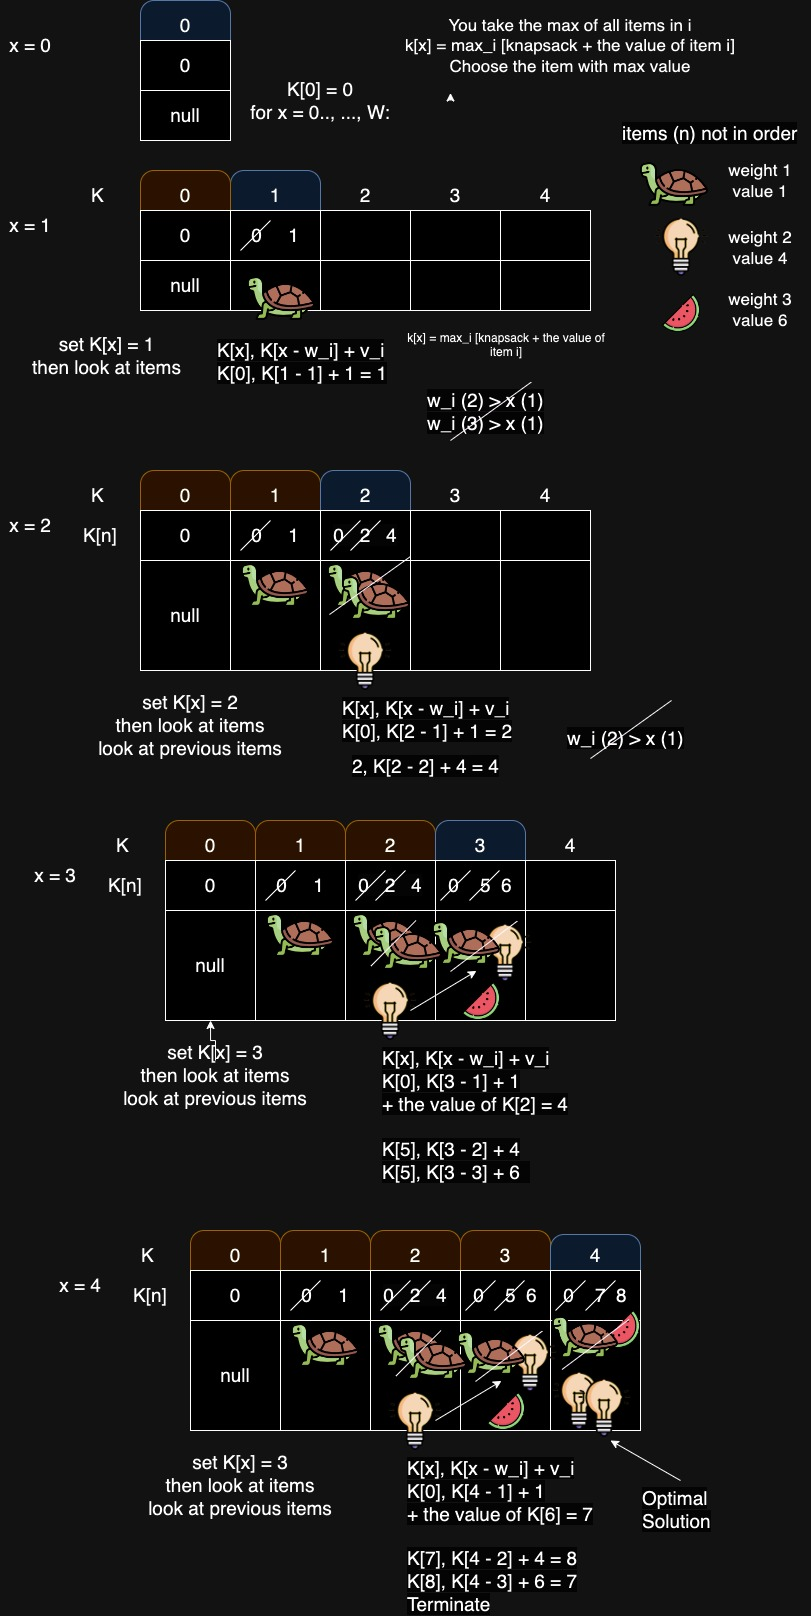

In [ ]:
def unboundedKnapsack(W, n, wt, vals, names):
    K = [0 for i in range(W + 1)]
    ITEMS = [[] for i in range(W + 1)]

    for x in range(1, W + 1):
       K[x] = 0
        for i in range(n):
            prev_k = K[x]

            if wt[i] <= x:
                if K[x - wt[i]] + vals[i] > K[x]:
                    K[x] = K[x - wt[i]] + vals[i]
                    ITEMS[x] = ITEMS[x - wt[i]] + [names[i]]  # Add names[i] as a separate item

    return K[W], ITEMS[W]

In [ ]:
W = 4
wt = [1, 2, 3]
vals = [1, 4, 6]
names = [["Turtle"], ["Globe"], ["WaterMelon"]]

n = len(vals)

print('We have {} items'.format(n))

We have 3 items


In [ ]:
K, ITEMS = unboundedKnapsack(W, n, wt, vals, names)

In [ ]:
ITEMS

[['Globe'], ['Globe']]

# Test Cases

In [ ]:
W = 10
wt = [1, 3, 4]
vals = [10, 40, 50]
names = ["A", "B", "C"] # 3 items
n = len(vals)

print(f'Number of items: #{n}')

K, ITEMS = unboundedKnapsack(W, n, wt, vals, names)
print(f"Maximum value: {K}")
print(f"Selected items: {', '.join(ITEMS)}")

print("-" * 40)

W = 6
wt = [1, 2, 3]
vals = [10, 9, 5]
names = ["Gum", "Sticker", "Shoe"]
n = len(vals)


print(f'Number of items: #{n}')

K, ITEMS = unboundedKnapsack(W, n, wt, vals, names)
print(f"Maximum value: {K}")
print(f"Selected items: {', '.join(ITEMS)}")

print("-" * 40)

W = 8
wt = [2, 3, 4]
vals = [3, 5, 7]
names = ["Knife", "Lamp", "Radio"]
n = len(vals)

print(f'Added items: #{n}')

K, ITEMS = unboundedKnapsack(W, n, wt, vals, names)
print(f"Maximum value: {K}")
print(f"Selected items: {', '.join(ITEMS)}")

Number of items: #3
Maximum value: 130
Selected items: B, B, B, A
----------------------------------------


***

### <font color='red'> Activity 3: In the earlier activity, you analysed the code for unbounded knapsack. Based on the algorithm discussed in this section, implement a solution to do 0/1 Knapsack. Make sure you test your algorithms for various test-cases. </font>

# 0/1 Knapsack Problem Bottom-Up DP
- Using a two-dimensional array
– Return the optimal value for a certain number of items (n), for the number of capacity (W).

- Two-dimensional structure storing values (n) and (W).
- Size of subproblem is different.
- Due to what items are available at each capacity.
- Solve a problem for fewer items, add more items to solve it, more…, n.
- We increase size of knapsack at each iteration.
- Keep track of what items have been used already.
- Uses a different data structure to unbounded Knapsack

### Time/ Space complexity
- O(nw)
- If there are n times and our knapsack has capacity W
- Reduces calculations due to 2D array storage (memory)


##### Ref:
- https://www.geeksforgeeks.org/0-1-knapsack-problem-dp-10/

 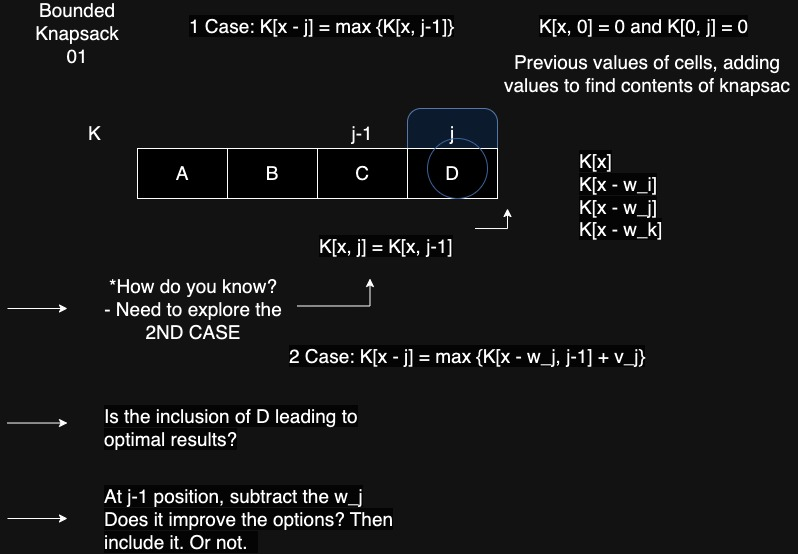

In [ ]:
def knapsack_01(W, wt, vals, n):
  if W == 0 or n == 0:
    return 0

  # 2D array K stores max value for each sub problem
  K = [[0] * (W + 1) for _ in range(n + 1)]

  # Fill 2D array (DP)
  for i in range(1, n + 1):
    for w in range(1, W + 1):
      if wt[i - 1] <= w:
        K[i][w] = max(vals[i - 1] + K[i - 1][w - wt[i - 1]], K[i - 1][w])
      else:
        K[i][w] = K[i - 1][w]

  # Backtrack to find selected items
  selected_items = []
  i, w = n, W
  while i > 0 and w > 0:
    if K[i][w] != K[i - 1][w]:
      selected_items.append(i)
      w -= wt[i - 1]
    i -= 1

  return K[n][W], selected_items[::-1]  # Reverse the list

Class Room Test-case

In [ ]:
W = 10
V = [20, 8, 14, 13, 35]
w = [6, 2, 4, 3, 11]

n = len(V)

print('We have {} items'.format(n))

We have 5 items


### Test Case 1

In [ ]:
W = 50 # Knapsack capacity
wt = [10, 20, 30] # Item weights
vals = [60, 100, 120] # Item values
n = len(vals)
print(f"Maximum value: {knapsack_01(W, wt, vals, n)}") # Solve

Maximum value: (220, [2, 3])


### Test Case 2
- Multiple items with varying weights/ values
- Capacity of knapsack (10) small for range of item weights (2-7)
- Knapsack has limited space - optimal choices need to be decided to max the total value

In [ ]:
W = 10 # Knapsack capacity
wt = [2, 3, 5, 7]  # Item weights
vals = [5, 8, 10, 6] # Item values

n = len(vals)
print(f"Maximum value: {knapsack_01(W, wt, vals, n)}") # Solve

Maximum value: (23, [1, 2, 3])


### Test Case 3
- Multiple items with varying weights/ values
- Larger knapsack (20) capacity relative to range of item weights (2-10)
- More flexibility for including items in backpack
- Higher chance of including items with higher value


In [ ]:
W = 20 # Knapsack capacity
wt = [2, 3, 6, 7, 10]  # Item weights
vals = [5, 8, 10, 6, 12] # Item values

n = len(vals)
print(f"Maximum value: {knapsack_01(W, wt, vals, n)}") # Solve

Maximum value: (30, [2, 3, 5])


### Test Case 4
- Larger knapsack (30) capacity relative to small range of item weights (2-15)
- More flexibility for including items in backpack

In [ ]:
W = 30  # Knapsack capacity
wt = [5, 2, 15]  # Item weights
vals = [10, 30, 20]  # Item values

# n = len(vals)
# print(f"Maximum value: {knapsack_01(W, wt, vals, n)}")
n = len(vals)
print(f"Maximum value: {knapsack_01(W, wt, vals, n)}") # Solve

Maximum value: (60, [1, 2, 3])


### Test Case 5
- Knapsack capacity 0

In [ ]:
# Test Case: Low Number of Weights and High Capacity
W = 0  # Knapsack capacity
wt = [5, 10, 15]  # Item weights
vals = [10, 30, 20]  # Item values

n = len(vals)
print(f"Maximum value: {knapsack_01(W, wt, vals, n)}") # Solve

Maximum value: 0


### Test Case 6
- no values

In [ ]:
# Test Case: Low Number of Weights and High Capacity
W = 5  # Knapsack capacity
wt = [5, 10, 20]  # Item weights
vals = []  # Item values

n = len(vals)
print(f"Maximum value: {knapsack_01(W, wt, vals, n)}") # Solve

Maximum value: 0


### Test Case 7
- Negative Values & Weights
- Using Try/ Except block as original algorithm wasn't designed for negatives

In [ ]:
W = 30
wt = [5, 10, -15, 8]
vals = [10, 30, -20, 15]

try:
  max_value, selected_items = knapsack_01(W, wt, vals)
except Exception as e:
  print(f"ERROR: {e}")
  print("Not able to accept Negative values/ weights at this time...")

ERROR: knapsack_01() missing 1 required positional argument: 'n'
Not able to accept Negative values/ weights at this time...


***